# Gradient Descent
This is an optimization algorithm

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import IPython.display as display
import ipywidgets as widgets
%matplotlib nbagg

In [2]:
n = 100
X = np.random.randn(n,1) * 10
ones = np.ones((n,1))
X = np.concatenate((X, ones), axis=1)
theta = np.array([[2],[3]])
y = np.dot(X, theta) + np.random.randn(n,1)*3

In [3]:
def cost(y_hat, y):
    n = y.shape[0]
    err = y_hat - y
    cost = np.dot(err.T, err) / n
    return cost

In [4]:
def gradient_descent(X, y, lr=1e-4, epochs=100):
    theta_hat = np.zeros((X.shape[1],1))
    loss = list()
    lst_theta_hat = list()
    lst_theta_hat.append(theta_hat.copy())
    for i in range(epochs):
        y_hat = np.dot(X, theta_hat)
        err = y_hat - y
        grad = np.dot(X.T, err).mean(axis=1).reshape(theta_hat.shape)
        theta_hat -= lr * grad
        lst_theta_hat.append(theta_hat.copy())
        loss.append((i+1, cost(y_hat, y).item()))
    
    return (loss, lst_theta_hat)

In [5]:
(loss, lst_theta_hat) = gradient_descent(X, y, epochs=800)
print(lst_theta_hat[-1])

[[1.95468243]
 [3.76774448]]


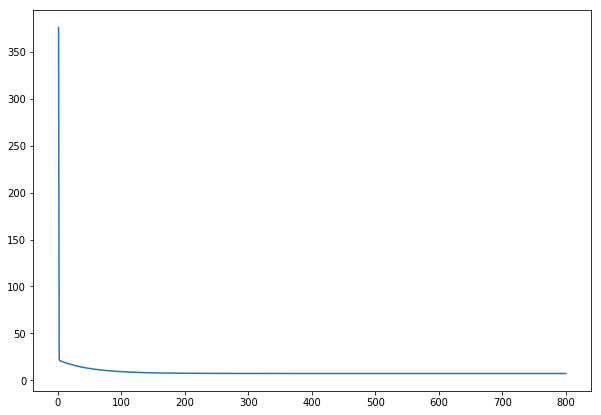

In [6]:
X_0 = np.linspace(-30,30,100).reshape((n,1))
X_0 = np.concatenate((X_0, np.ones((X_0.shape[0],1))), axis=1)
y_0 = np.dot(X_0, lst_theta_hat[-1])
learning_curve = np.array(loss)
plt.figure(figsize=(10,7))
# plt.scatter(X[:,0], y)
# plt.plot(X_0[:,0], y_0, color='red')
plt.plot(learning_curve[:,0], learning_curve[:,1])
plt.show()

In [7]:
import bqplot.pyplot as plt
from bqplot import *
from ipywidgets import *

In [8]:
time_interval = 500
y_0 = np.dot(X_0, lst_theta_hat[0])

x_sc = LinearScale()
y_sc = LinearScale()

ax_x = Axis(label='X', scale=x_sc, grid_lines='solid')
ax_y = Axis(label='y', scale=y_sc, orientation='vertical', side='left', grid_lines='solid')

fig = plt.figure(animation_duration=time_interval)
scatter = plt.scatter(x=X[:,0].flatten(), y=y.flatten(), visible=True)
reg_line = plt.plot(x=X_0[:,0].flatten(), y=y_0.flatten(), colors=['red'])

slider = IntSlider(min=0, max=len(lst_theta_hat)/10, step=1, description="Epochs x 10", value=0)
# epoch_text = Label(x=[0.75], y=[0.10], default_size=46, font_weight='bolder', colors=['orange'],
#                    text=[str(0)], enable_move=True)
play = Play(min=0, max=len(lst_theta_hat)/10, interval=time_interval)

def slider_update(change):
    theta = lst_theta_hat[slider.value * 10]
    reg_line.y = np.dot(X_0, theta).flatten()

slider.observe(slider_update, 'value')

In [9]:
jslink((play, 'value'), (slider, 'value'))
VBox([HBox([play, slider]), fig])

In [10]:
print(lst_theta_hat)

[array([[0.],
       [0.]]), array([[1.84364932],
       [0.02263493]]), array([[1.92117846],
       [0.05924358]]), array([[1.92471335],
       [0.09608328]]), array([[1.92514541],
       [0.13258181]]), array([[1.92544466],
       [0.16871869]]), array([[1.92573554],
       [0.2044965 ]]), array([[1.92602332],
       [0.23991877]]), array([[1.92630822],
       [0.27498904]]), array([[1.92659029],
       [0.3097108 ]]), array([[1.92686955],
       [0.34408751]]), array([[1.92714605],
       [0.37812261]]), array([[1.92741979],
       [0.41181949]]), array([[1.92769082],
       [0.4451815 ]]), array([[1.92795915],
       [0.47821199]]), array([[1.92822481],
       [0.51091423]]), array([[1.92848784],
       [0.5432915 ]]), array([[1.92874825],
       [0.57534702]]), array([[1.92900607],
       [0.607084  ]]), array([[1.92926133],
       [0.63850559]]), array([[1.92951405],
       [0.66961492]]), array([[1.92976427],
       [0.70041512]]), array([[1.93001199],
       [0.73090923]]), arr